In [2]:
#All IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
#dataset Importing and Cleaning 
raw_data = pd.read_csv (r'C:\Users\ASUS-ECC\Documents\Doctorat\schizo\datacleaned.csv')
raw_data = raw_data.dropna()
raw_data = raw_data[pd.to_numeric(raw_data['g8'], errors='coerce').notnull()]
raw_data = raw_data[pd.to_numeric(raw_data['PANSS total (score)'], errors='coerce').notnull()]
raw_data.columns

Index(['Department designation', 'ID', 'family history (yes, no)', 'sex (f,m)',
       'date of birth', 'summer birth (yes, no)', 'winter birth (yes, no)',
       'autumn birth (yes, no)', 'spring birth (yes, no)',
       'age at admission (y.o.)', 'age at onset (y.o.)',
       'PANSS-Positive (score)', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7',
       'PANSS-Negative (score)', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7',
       'PANSS-General psychopathology (score)', 'g1', 'g2', 'g3', 'g4', 'g5',
       'g6', 'g7', 'g8', 'g9', 'g10', 'g11', 'g12', 'g13', 'g14', 'g15', 'g16',
       'PANSS total (score)', 'Avolition/Asociality factor, score',
       'Diminished Expression factor, score'],
      dtype='object')

In [4]:
#Different data for different regressions
data_positive = pd.DataFrame(raw_data, columns= ['PANSS-Positive (score)','p1','p2','p3','p4','p5','p6','p7'])
data_positive = data_positive.to_numpy()
data_negative = pd.DataFrame(raw_data, columns= ['PANSS-Negative (score)','n1','n2','n3','n4','n5','n6','n7'])
data_negative = data_negative.to_numpy()
data_general_psychopathology = pd.DataFrame(raw_data, columns= ['PANSS-General psychopathology (score)','g1','g2','g3','g4','g5','g6','g7','g8','g9','g10','g11','g12','g13','g14','g15','g16'])
data_general_psychopathology = data_general_psychopathology.to_numpy()
#changing datatype for data_general_psychopathology as float
data_general_psychopathology = np.vstack(data_general_psychopathology[:, :]).astype(float)
data_final = pd.DataFrame(raw_data, columns= ['PANSS total (score)','PANSS-Positive (score)','PANSS-Negative (score)','PANSS-General psychopathology (score)'])
data_final = data_final.to_numpy()
#changing datatype for data_final as float
data_final = np.vstack(data_final[:, :]).astype(float)

##ignore
#data_positive = data_positive[~np.isnan(data_positive).any(axis=1), :]
#data_negative = data_negative[~np.isnan(data_negative).any(axis=1), :]
#data_general_psychopathology = data_general_psychopathology[~np.isnan(data_general_psychopathology).any(axis=1), :]


In [5]:
#all regression models and their training
model_positive = LinearRegression()
model_positive.fit(data_positive[:,1:len(data_positive[0])+1],data_positive[:,0].reshape(-1, 1))
model_negative = LinearRegression()
model_negative.fit(data_negative[:,1:len(data_negative[0])+1],data_negative[:,0].reshape(-1, 1))
model_general_psy = LinearRegression()
model_general_psy.fit(data_general_psychopathology[:,1:len(data_general_psychopathology[0])+1],data_general_psychopathology[:,0].reshape(-1, 1))
model_final = LinearRegression()
model_final.fit(data_final[:,1:len(data_final[0])+1],data_final[:,0].reshape(-1, 1))

LinearRegression()

Feature: 0, Score: 0.98226
Feature: 1, Score: 1.00745
Feature: 2, Score: 1.00302
Feature: 3, Score: 1.00222
Feature: 4, Score: 1.01744
Feature: 5, Score: 1.01383
Feature: 6, Score: 0.98852


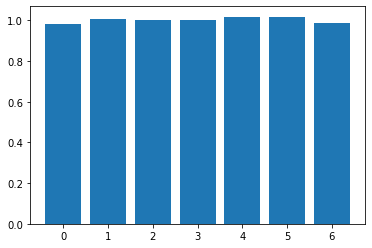

In [6]:
#getting coefficents for postive data model
importance_positive = model_positive.coef_
for i,v in enumerate(importance_positive[0]):
    print('Feature: %0d, Score: %.5F' % (i,v))
plt.bar([x for x in range(len(importance_positive[0]))], importance_positive[0])
plt.show()

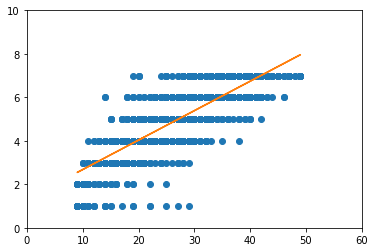

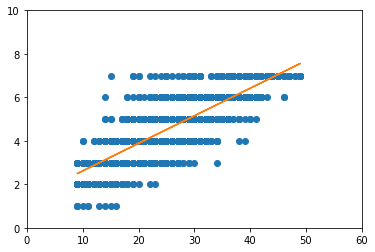

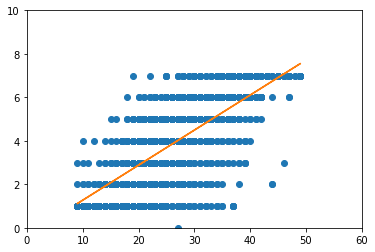

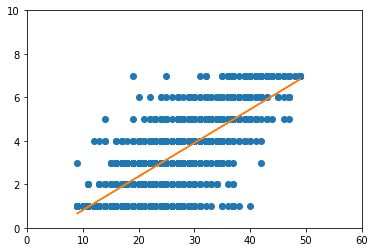

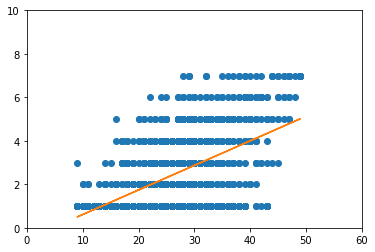

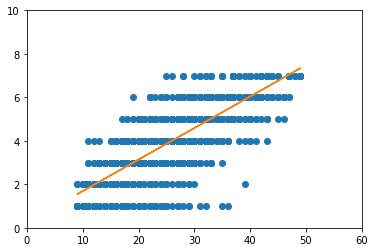

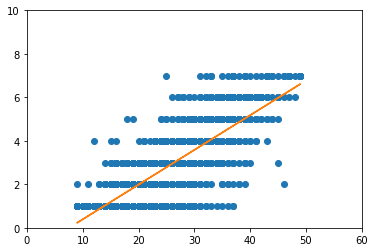

In [7]:
#ploting regression for positive symptoms to positive score
for i in range(1, len(importance_positive[0])+1):
    #plt.scatter(data_positive[:,0].reshape(-1, 1),data_positive[:,1].reshape(-1, 1))
    plt.plot(data_positive[:,0].reshape(-1, 1), data_positive[:,i].reshape(-1, 1),'o')
    m, b = np.polyfit(data_positive[:,0], data_positive[:,i].reshape(-1, 1), 1)
    plt.plot(data_positive[:,0].reshape(-1, 1), m*data_positive[:,0].reshape(-1, 1) + b)
    plt.ylim(0,10)
    plt.xlim(0,60)
    plt.show()

Feature: 0, Score: 0.99284
Feature: 1, Score: 1.00705
Feature: 2, Score: 1.00225
Feature: 3, Score: 0.99553
Feature: 4, Score: 1.00202
Feature: 5, Score: 1.00052
Feature: 6, Score: 1.00077


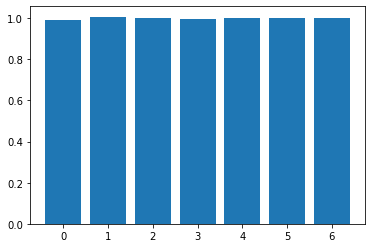

In [8]:
#getting coefficents for negative data model
importance_negative = model_negative.coef_
for i,v in enumerate(importance_negative[0]):
    print('Feature: %0d, Score: %.5F' % (i,v))
plt.bar([x for x in range(len(importance_negative[0]))], importance_negative[0])
plt.show()

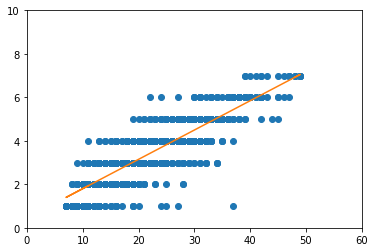

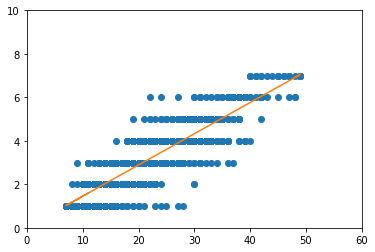

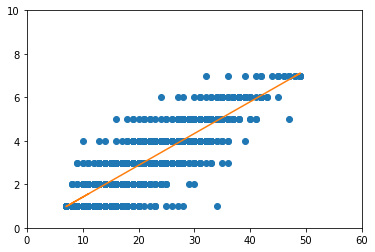

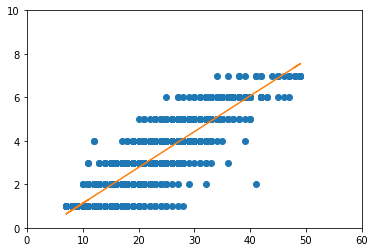

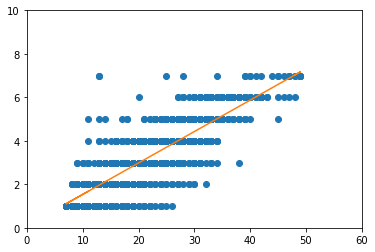

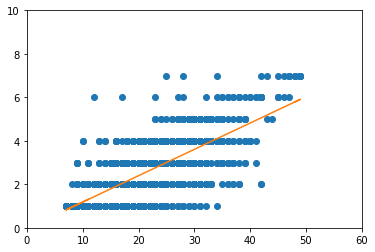

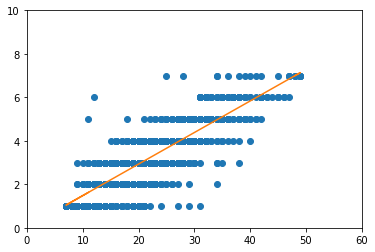

In [9]:
#ploting regression for negative symptoms to negative score
for i in range(1, len(importance_negative[0])+1):
    #plt.scatter(data_positive[:,0].reshape(-1, 1),data_positive[:,1].reshape(-1, 1))
    plt.plot(data_negative[:,0].reshape(-1, 1), data_negative[:,i].reshape(-1, 1),'o')
    m, b = np.polyfit(data_negative[:,0], data_negative[:,i].reshape(-1, 1), 1)
    plt.plot(data_negative[:,0].reshape(-1, 1), m*data_negative[:,0].reshape(-1, 1) + b)
    plt.ylim(0,10)
    plt.xlim(0,60)
    plt.show()

Feature: 0, Score: 0.96936
Feature: 1, Score: 1.03394
Feature: 2, Score: 0.93469
Feature: 3, Score: 1.02867
Feature: 4, Score: 0.98364
Feature: 5, Score: 1.00420
Feature: 6, Score: 0.98569
Feature: 7, Score: 0.99214
Feature: 8, Score: 1.01568
Feature: 9, Score: 0.97226
Feature: 10, Score: 0.95340
Feature: 11, Score: 0.98114
Feature: 12, Score: 1.06392
Feature: 13, Score: 0.97385
Feature: 14, Score: 1.06949
Feature: 15, Score: 0.93374


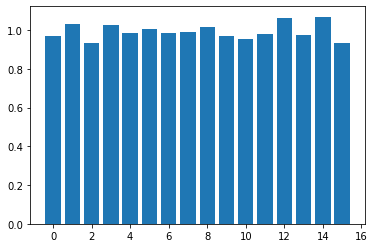

In [10]:
#getting coefficents for general psychopathology data model
importance_general = model_general_psy.coef_
for i,v in enumerate(importance_general[0]):
    print('Feature: %0d, Score: %.5F' % (i,v))
plt.bar([x for x in range(len(importance_general[0]))], importance_general[0])
plt.show()

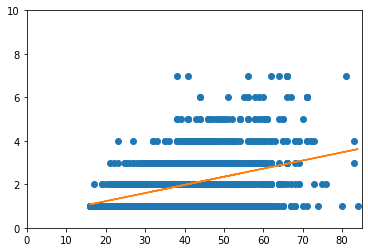

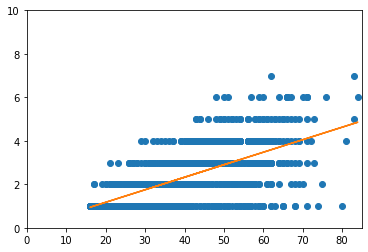

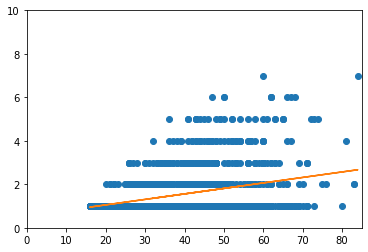

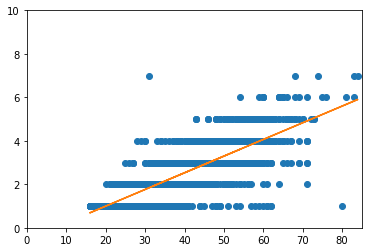

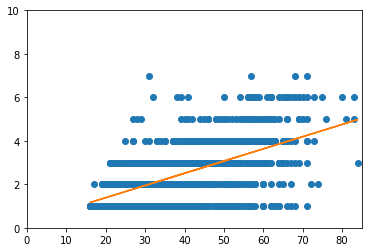

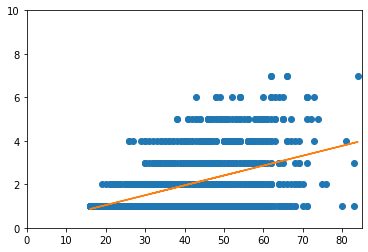

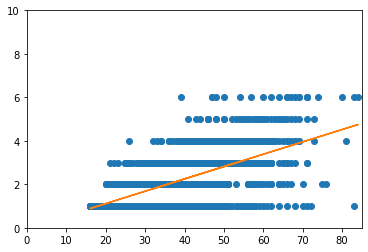

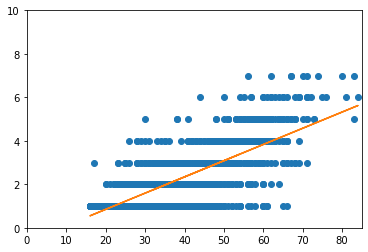

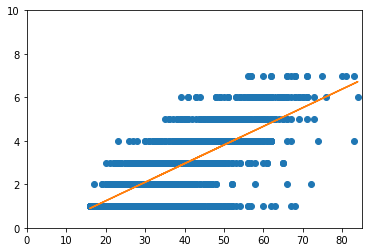

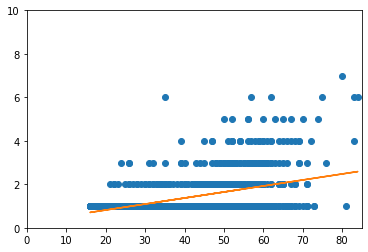

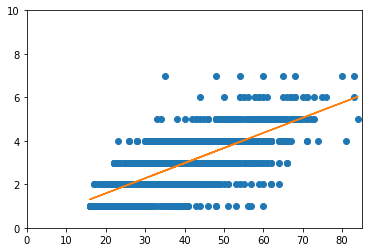

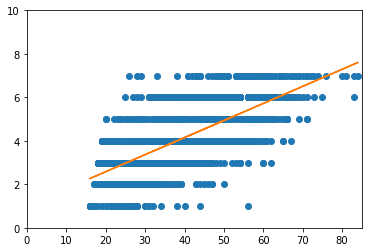

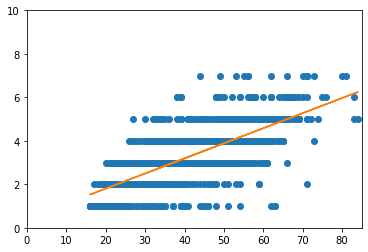

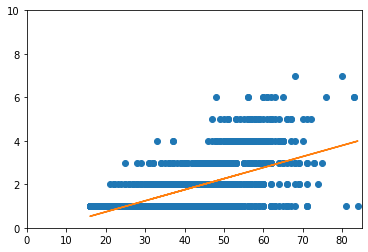

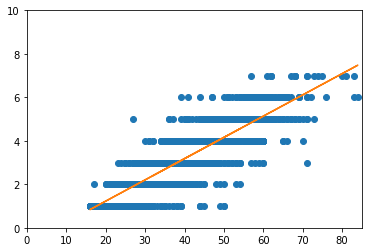

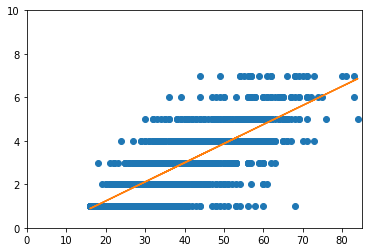

In [11]:
#ploting regression for general symptoms to general score
for i in range(1, len(importance_general[0])+1):
    #plt.scatter(data_positive[:,0].reshape(-1, 1),data_positive[:,1].reshape(-1, 1))
    plt.plot(data_general_psychopathology[:,0].reshape(-1, 1), data_general_psychopathology[:,i].reshape(-1, 1),'o')
    m, b = np.polyfit(data_general_psychopathology[:,0], data_general_psychopathology[:,i].reshape(-1, 1), 1)
    plt.plot(data_general_psychopathology[:,0].reshape(-1, 1), m*data_general_psychopathology[:,0].reshape(-1, 1) + b)
    plt.ylim(0,10)
    plt.xlim(0,85)
    plt.show()

Feature: 0, Score: 0.69113
Feature: 1, Score: 1.02048
Feature: 2, Score: 1.08566


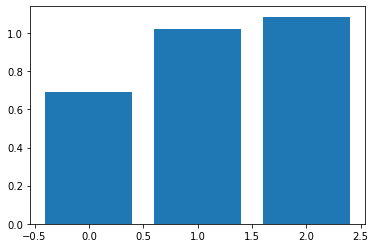

In [12]:
#getting coefficents for final score data model
importance_final = model_final.coef_
for i,v in enumerate(importance_final[0]):
    print('Feature: %0d, Score: %.5F' % (i,v))
plt.bar([x for x in range(len(importance_final[0]))], importance_final[0])
plt.show()

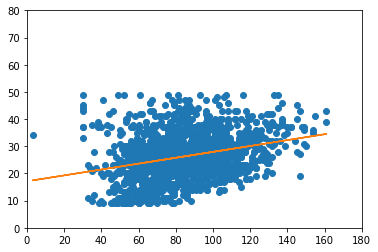

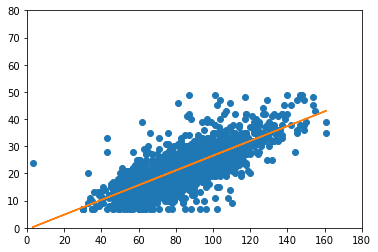

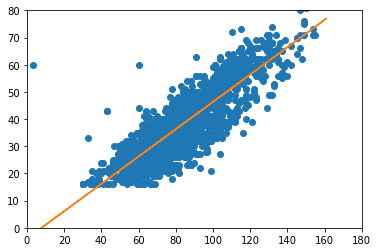

In [13]:
#ploting regression for positive/negative/general scores to total score
for i in range(1, len(importance_final[0])+1):
    #plt.scatter(data_positive[:,0].reshape(-1, 1),data_positive[:,1].reshape(-1, 1))
    plt.plot(data_final[:,0].reshape(-1, 1), data_final[:,i].reshape(-1, 1),'o')
    m, b = np.polyfit(data_final[:,0], data_final[:,i].reshape(-1, 1), 1)
    plt.plot(data_final[:,0].reshape(-1, 1), m*data_final[:,0].reshape(-1, 1) + b)
    plt.ylim(0,80)
    plt.xlim(0,180)
    plt.show()